In [230]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [229]:
np.random.randn(10)

array([ 0.45007796,  2.54864322, -0.32681755, -0.49539959, -2.31963054,
       -0.03025156,  1.75249905,  0.3291019 ,  1.3348468 ,  0.01375218])

## 10 armed bandit game setup 

In [2]:

bandit_probs = np.random.dirichlet(np.ones(10))
bandit_probs

array([0.0239195 , 0.04421157, 0.16685689, 0.06792057, 0.10348732,
       0.00780499, 0.15996689, 0.08111472, 0.13255954, 0.21215801])

In [3]:
def pullArm(i):
    r = random.random()
    if r <= bandit_probs[i]:
        return 1
    else:
        return 0

In [4]:
pullArm(0)

0

### Simulation using sample-average greedy method

In [206]:
def actionEstimation(n, rewards):

    # Estimate reward from action based sample-average method
    estimated_value = 0
    for i in rewards:
        estimated_value = estimated_value + rewards[i]
    if n != 0:
        estimated_value = estimated_value / n
    return estimated_value 

In [199]:
def actionSelection(state):
    best_action = random.randint(0, 9)
    for i in range(10):
        val = actionEstimation(state[f'{i}']["n_chosen"], state[f'{i}']["rewards"]) 
        best_action_val = actionEstimation(state[f'{best_action}']["n_chosen"], state[f'{best_action}']["rewards"])
        if val > best_action_val:
            best_action = i
    return best_action

In [200]:
def game_loop(timestep, state):
    action = actionSelection(state)
    reward = pullArm(action)
    state[f'{action}']["n_chosen"] =  state[f'{action}']["n_chosen"] + 1
    state[f'{action}']["rewards"].append(reward)
    timestep = timestep + 1

In [201]:
def calculate_total_rewards(state):
    total_rewards = 0
    for key, value in state.items():
        total_rewards += sum(value['rewards'])
    return total_rewards


## Epsilon action selection method

In [129]:
epsilon = 0.1

In [202]:
def epsilonGreedySelection(state):
    best_action = random.randint(0, 9)
    r = random.random()
    if r <= epsilon:
        return random.randint(0, 9)
    for i in range(10):
        val = actionEstimation(state[f'{i}']["n_chosen"], state[f'{i}']["rewards"]) 
        best_action_val = actionEstimation(state[f'{best_action}']["n_chosen"], state[f'{best_action}']["rewards"])
        if val > best_action_val:
            best_action = i
    return best_action

In [203]:
def game_loop_epsilon(timestep, state):
    action = epsilonGreedySelection(state)
    reward = pullArm(action)
    state[f'{action}']["n_chosen"] =  state[f'{action}']["n_chosen"] + 1
    state[f'{action}']["rewards"].append(reward)
    timestep = timestep + 1

{'0': {'n_chosen': 196, 'rewards': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, '1': {'n_chosen': 200, 'rewards': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

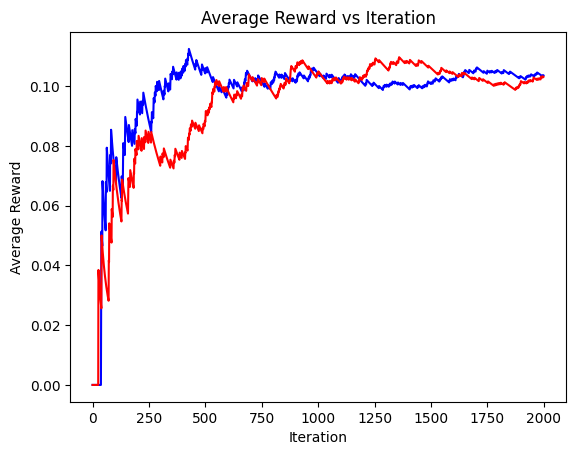

In [226]:
greedy_rewards = []
epsilon_rewards = []
epsilon_state = {
    "0": {
        "n_chosen": 0,
        "rewards": []
    },
    "1": {
        "n_chosen": 0,
        "rewards": []
    },
    "2": {
        "n_chosen": 0,
        "rewards": []
    },
    "3": {
        "n_chosen": 0,
        "rewards": []
    },
    "4": {
        "n_chosen": 0,
        "rewards": []
    },
    "5": {
        "n_chosen": 0,
        "rewards": []
    },
    "6": {
        "n_chosen": 0,
        "rewards": []
    },
    "7": {
        "n_chosen": 0,
        "rewards": []
    },
    "8": {
        "n_chosen": 0,
        "rewards": []
    },
    "9": {
        "n_chosen": 0,
        "rewards": []
    },
}
greedy_state = {
    "0": {
        "n_chosen": 0,
        "rewards": []
    },
    "1": {
        "n_chosen": 0,
        "rewards": []
    },
    "2": {
        "n_chosen": 0,
        "rewards": []
    },
    "3": {
        "n_chosen": 0,
        "rewards": []
    },
    "4": {
        "n_chosen": 0,
        "rewards": []
    },
    "5": {
        "n_chosen": 0,
        "rewards": []
    },
    "6": {
        "n_chosen": 0,
        "rewards": []
    },
    "7": {
        "n_chosen": 0,
        "rewards": []
    },
    "8": {
        "n_chosen": 0,
        "rewards": []
    },
    "9": {
        "n_chosen": 0,
        "rewards": []
    },
}
timestep = 0
iters = 2000
for i in range(iters):
    game_loop_epsilon(timestep=timestep, state=epsilon_state)
    game_loop(timestep=timestep, state=greedy_state)

    avg_reward_epsilon = calculate_total_rewards(state=epsilon_state)
    avg_reward_greedy =calculate_total_rewards(state=greedy_state) 

    if i != 0:
        avg_reward_epsilon = avg_reward_epsilon/ i

        avg_reward_greedy = avg_reward_greedy/ i
    epsilon_rewards.append(avg_reward_epsilon)
    greedy_rewards.append(avg_reward_greedy)

x_greedy = range(iters)
y_greedy = [greedy_rewards[i] for i in range(iters)]

x_epsilon = range(iters)
y_epsilon = [epsilon_rewards[i] for i in range(iters)]

print(epsilon_state)
print(greedy_state)

plt.plot(x_greedy, y_greedy, color="blue")

plt.plot(x_epsilon, y_epsilon, color="red")
plt.xlabel('Iteration')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Iteration')
plt.show()